<h1 style="text-align:center;">Proyecto</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Diego Castellanos</h4>
<h5 style="text-align:center;">4/8/2023</h5>

## pips

In [482]:
#pip install pandas-profiling

In [483]:
#pip install quickda

## librerias


In [484]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from quickda.clean_data import *

## importando los .csv

In [485]:
AltaVerapaz = pd.read_csv('data/csv/AltaVerapaz.csv', encoding='latin1')
BajaVerapaz = pd.read_csv('data/csv/BajaVerapaz.csv', encoding='latin1')
Chimaltenango = pd.read_csv('data/csv/Chimaltenango.csv', encoding='latin1')
Chiquimula = pd.read_csv('data/csv/Chiquimula.csv', encoding='latin1')
CiudadCapital = pd.read_csv('data/csv/CiudadCapital.csv', encoding='latin1')
ElProgreso = pd.read_csv('data/csv/ElProgreso.csv', encoding='latin1')
Escuintla = pd.read_csv('data/csv/Escuintla.csv', encoding='latin1')
Guatemala = pd.read_csv('data/csv/Guatemala.csv', encoding='latin1')
Huehuetenango = pd.read_csv('data/csv/Huehuetenango.csv', encoding='latin1')
Izabal = pd.read_csv('data/csv/Izabal.csv', encoding='latin1')
Jalapa = pd.read_csv("data/csv/Jalapa.csv", encoding='latin1')
Jutiapa = pd.read_csv("data/csv/Jutiapa.csv", encoding='latin1')
Peten = pd.read_csv("data/csv/Peten.csv", encoding='latin1')
Quetzaltenango = pd.read_csv("data/csv/Quetzaltenango.csv", encoding='latin1')
Quiche = pd.read_csv("data/csv/Quiche.csv", encoding='latin1')
Retalhuleu = pd.read_csv("data/csv/Retalhuleu.csv", encoding='latin1')
Sacatepequez = pd.read_csv("data/csv/Sacatepequez.csv", encoding='latin1')
SanMarcos = pd.read_csv("data/csv/SanMarcos.csv", encoding='latin1')
SantaRosa = pd.read_csv("data/csv/SantaRosa.csv", encoding='latin1')
Solola = pd.read_csv("data/csv/Solola.csv", encoding='latin1') 
Suchitepequez = pd.read_csv("data/csv/Suchitepequez.csv", encoding='latin1')
Totonicapan = pd.read_csv("data/csv/Totonicapan.csv", encoding='latin1')
Zacapa = pd.read_csv("data/csv/Zacapa.csv", encoding='latin1')

## Reuniendolo en un solo dataset

In [486]:
departamentos = [AltaVerapaz, BajaVerapaz, Chimaltenango, Chiquimula, CiudadCapital, ElProgreso, Escuintla, Guatemala, Huehuetenango, Izabal,
                 Jalapa, Jutiapa, Peten, Quetzaltenango, Quiche, Retalhuleu, Sacatepequez, SanMarcos, SantaRosa, Solola, 
                 Suchitepequez, Totonicapan, Zacapa]

In [487]:
PaisGuatemala = pd.concat(departamentos, join='inner')
titulos = PaisGuatemala.iloc[0]
PaisGuatemala = PaisGuatemala[1:]
PaisGuatemala.columns = titulos
PaisGuatemala.rename(columns=PaisGuatemala.iloc[0])
print(PaisGuatemala)


0                              CODIGO DISTRITO  DEPARTAMENTO  MUNICIPIO  \
1                       16-01-0138-46   16-031  ALTA VERAPAZ      COBAN   
2                       16-01-0139-46   16-031  ALTA VERAPAZ      COBAN   
3                       16-01-0140-46   16-031  ALTA VERAPAZ      COBAN   
4                       16-01-0141-46   16-005  ALTA VERAPAZ      COBAN   
5                       16-01-0142-46   16-005  ALTA VERAPAZ      COBAN   
..                                ...      ...           ...        ...   
93                      19-10-0013-46   19-015        ZACAPA      HUITE   
94                      19-10-1009-46   19-015        ZACAPA      HUITE   
95                      19-11-0018-46   19-020        ZACAPA  SAN JORGE   
96                                NaN      NaN           NaN        NaN   
97  95 Establecimientos encontradosÂ       NaN           NaN        NaN   

0                                     ESTABLECIMIENTO  \
1                                       CO

In [488]:
PaisGuatemala.to_csv('output/PaisGuatemalaSucio.csv', index=False,encoding='utf-8')

In [489]:
print(list(PaisGuatemala.keys()))

['CODIGO', 'DISTRITO', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTABLECIMIENTO', 'DIRECCION', 'TELEFONO', 'SUPERVISOR', 'DIRECTOR', 'NIVEL', 'SECTOR', 'AREA', 'STATUS', 'MODALIDAD', 'JORNADA', 'PLAN', 'DEPARTAMENTAL']


##  Generar un informe de perfil sobre un conjunto de datos en forma de DataFrame de Pandas.

In [490]:
perfil = ProfileReport(PaisGuatemala)
perfil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## limpieza

Eliminando duplicados

In [491]:
PaisGuatemala=PaisGuatemala.drop_duplicates()

Cantidad de valores nulos en cada variable

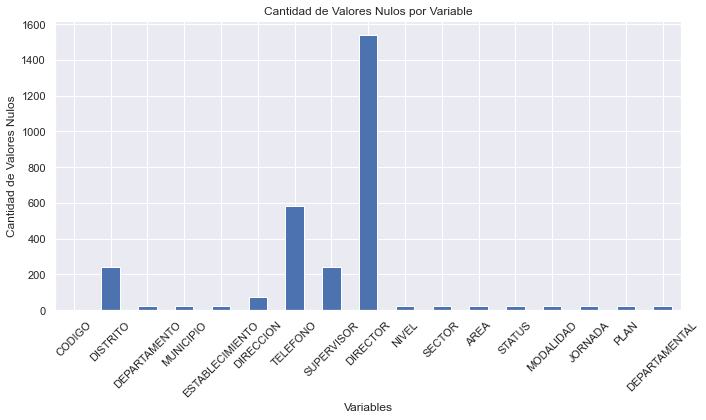

In [492]:
null_counts = PaisGuatemala.isnull().sum()

plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Variable')
plt.xlabel('Variables')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Colocando valores nulos en lugares mal ingresados

In [493]:
for i in PaisGuatemala.columns:
    for j in PaisGuatemala[i]:
        if type(j) == str:
            if j[0] == "-" or j[0]=="." or j == "SIN DATO":
                PaisGuatemala = clean(PaisGuatemala, method = "replaceval",       
                columns = [],
                to_replace = j,
                value = np.nan) 
original = len(PaisGuatemala)
PaisGuatemala.dropna(inplace=True)
final = len(PaisGuatemala)
dif = original - final
print(f'Filas perdidas: {dif}')
print(f'Proporción: {dif/original}')

Filas perdidas: 2103
Proporción: 0.2521885118119679


Cuantas veces se repiten los establecimientos

In [494]:
print(PaisGuatemala.ESTABLECIMIENTO.value_counts())

INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA                                                       216
INSTITUTO NACIONAL DE EDUCACIÃN DIVERSIFICADA                                                       68
CENTRO DE EDUCACIÃN EXTRAESCOLAR -CEEX-                                                             26
INSTITUTO DE EDUCACION DIVERSIFICADA POR COOPERATIVA DE ENSEÃANZA                                   21
INSTITUTO DE EDUCACIÃN DIVERSIFICADA POR COOPERATIVA DE ENSEÃANZA                                  17
                                                                                                   ... 
CENTRO EDUCATIVO "OPORTUNIDAD PARA LOS NIÃOS Y EL ARTESANO 3000" (KINDERCHANCE Y HANDWERK 3000)      1
COLEGIO INTEGRAL TECNOLÃGICO CIENTÃFICO CITEC                                                       1
COLEGIO MIXTO MARIANO "TOTUS TUUS"                                                                    1
COLEGIO MIXTO MARIANO " TOTUS TUUS "                            

Cuantas veces se repiten los establecimientos

In [495]:
print(PaisGuatemala.DIRECTOR.value_counts())

MARÃA DOLORES PÃREZ TUCHÃN           9
HECTOR REYNALDO GOMEZ AGUILAR           8
FREDY AMILCAR CRUZ                      7
IRIS MARICLO MORALES LUNA               7
FREDY FERNANDO CASTELLANOS              7
                                       ..
MADELINE LORENA SANDOVAL                1
MADELINE LORENA SANDOVAL LOPEZ          1
SHERLIN ANGELICA GARCÃA PÃREZ         1
LIBERT AD AMÃRICA AMEZQUITA SALAZAR    1
VICTOR HUGO GUERRA MONROY               1
Name: DIRECTOR, Length: 4284, dtype: int64


Cambiando indices

In [496]:
PaisGuatemala.index = list(range(0,final))

Quitando acentos de los datos

In [497]:
cols = PaisGuatemala.select_dtypes(include=[object]).columns
PaisGuatemala[cols] = PaisGuatemala[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
print("\n",PaisGuatemala.ESTABLECIMIENTO.value_counts())


 INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA                        216
INSTITUTO NACIONAL DE EDUCACIAN DIVERSIFICADA                         69
CENTRO DE EDUCACIAN EXTRAESCOLAR -CEEX-                               26
INSTITUTO DE EDUCACION DIVERSIFICADA POR COOPERATIVA DE ENSEAANZA     21
INSTITUTO DE EDUCACIAN DIVERSIFICADA POR COOPERATIVA DE ENSEAANZA     17
                                                                    ... 
CENTRO EDUCATIVO ESTUARDO NOVELLA CAMACHO - CENCA                      1
LICEO INTERCULTURAL MONTUFAR                                           1
COLEGIO CRISTIANO MACEDONIA                                            1
COLEGIO MIXTO EL BUEN PASTOR                                           1
INSTITUTO DIVERSIFICADO                                                1
Name: ESTABLECIMIENTO, Length: 3622, dtype: int64


Pasando a nulos datos irrelevantes en director

In [498]:
patterns_to_replace = ['.', '..', '...', '-', '--', '---', '----', '-----',
                       '------', '-------', '--------', '---------', '----------',
                       '-----------', '------------', '-------------', '--------------',
                       '---------------', '----------------', '-----------------',
                       '-------------------', '0', 'X', ' ', 'SIN DATO']

for pattern in patterns_to_replace:
    PaisGuatemala['DIRECTOR'] = PaisGuatemala['DIRECTOR'].replace(pattern, np.NaN)
print("\n",PaisGuatemala.DIRECTOR.value_counts())


 MARAA DOLORES PAREZ TUCHAN        9
HECTOR REYNALDO GOMEZ AGUILAR     8
JORGE GRANADOS GUZMAN             8
EVA JUDITH HERNANDEZ MARQUEZ      8
GUILLERMO CASTILLO                7
                                 ..
CASAR ARMANDO CABRERA GARCAA      1
DELIA ESPERANZA BAJXAC GARCAA     1
JOESSELLINE HAYDEE MUAOZ MAYEN    1
KELITA BETSABA NORIEGA MORALES    1
VICTOR HUGO GUERRA MONROY         1
Name: DIRECTOR, Length: 4230, dtype: int64


Verificamos para saber si hay algun dato que no tiene que ver en cada columna

In [499]:
# Crear un diccionario para almacenar los valores únicos de cada columna
unique_values_dict = {}

# Recorrer todas las columnas y obtener los valores únicos
for column in PaisGuatemala.columns:
    unique_values_dict[column] = PaisGuatemala[column].unique()

# Mostrar los valores únicos para cada columna
for column, unique_values in unique_values_dict.items():
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print()

Valores únicos en la columna 'CODIGO':
['16-01-0138-46' '16-01-0140-46' '16-01-0143-46' ... '19-10-0013-46'
 '19-10-1009-46' '19-11-0018-46']

Valores únicos en la columna 'DISTRITO':
['16-031' '16-006' '16-005' '16-037' '16-050' '16-008' '16-007' '16-009'
 '16-011' '16-046' '16-036' '16-012' '16-013' '16-041' '16-015' '16-018'
 '16-017' '16-019' '16-021' '16-022' '16-023' '16-024' '16-026' '16-025'
 '16-027' '16-028' '16-039' '16-030' 'DISTRITO' '15-001' '15-026' '15-030'
 '15-024' '15-034' '15-006' '15-032' '15-031' '15-029' '15-011' '15-016'
 '15-015' '15-018' '15-019' '15-020' '15-021' '04-001' '04-027' '04-020'
 '04-028' '04-003' '04-002' '04-029' '04-012' '04-022' '04-033' '04-006'
 '04-005' '04-007' '04-023' '04-018' '04-034' '04-015' '04-011' '04-035'
 '04-021' '04-014' '04-013' '04-036' '04-019' '04-009' '04-026' '04-016'
 '04-017' '04-030' '04-004' '04-025' '04-008' '04-024' '20-001' '20-024'
 '20-027' '20-030' '20-039' '20-034' '20-003' '20-004' '20-043' '20-042'
 '20-017' '

Corregimos algunas filas irrelevantes

In [500]:
patterns_to_replace = ['01-','17-']

for pattern in patterns_to_replace:
    PaisGuatemala['DISTRITO'] = PaisGuatemala['DISTRITO'].replace(pattern, np.NaN)
print("\n",PaisGuatemala.DISTRITO.value_counts())


 11-017    120
05-033    114
01-403    112
18-039     83
05-007     77
         ... 
14-026      1
14-023      1
14-010      1
14-009      1
19-020      1
Name: DISTRITO, Length: 626, dtype: int64


Columnas de unas datas que se escaparon en el dataset

In [501]:
PaisGuatemala = PaisGuatemala[PaisGuatemala['DISTRITO'] != 'DISTRITO']

In [502]:
# Crear un diccionario para almacenar los valores únicos de cada columna
unique_values_dict = {}

# Recorrer todas las columnas y obtener los valores únicos
for column in PaisGuatemala.columns:
    unique_values_dict[column] = PaisGuatemala[column].unique()

# Mostrar los valores únicos para cada columna
for column, unique_values in unique_values_dict.items():
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print()

Valores únicos en la columna 'CODIGO':
['16-01-0138-46' '16-01-0140-46' '16-01-0143-46' ... '19-10-0013-46'
 '19-10-1009-46' '19-11-0018-46']

Valores únicos en la columna 'DISTRITO':
['16-031' '16-006' '16-005' '16-037' '16-050' '16-008' '16-007' '16-009'
 '16-011' '16-046' '16-036' '16-012' '16-013' '16-041' '16-015' '16-018'
 '16-017' '16-019' '16-021' '16-022' '16-023' '16-024' '16-026' '16-025'
 '16-027' '16-028' '16-039' '16-030' '15-001' '15-026' '15-030' '15-024'
 '15-034' '15-006' '15-032' '15-031' '15-029' '15-011' '15-016' '15-015'
 '15-018' '15-019' '15-020' '15-021' '04-001' '04-027' '04-020' '04-028'
 '04-003' '04-002' '04-029' '04-012' '04-022' '04-033' '04-006' '04-005'
 '04-007' '04-023' '04-018' '04-034' '04-015' '04-011' '04-035' '04-021'
 '04-014' '04-013' '04-036' '04-019' '04-009' '04-026' '04-016' '04-017'
 '04-030' '04-004' '04-025' '04-008' '04-024' '20-001' '20-024' '20-027'
 '20-030' '20-039' '20-034' '20-003' '20-004' '20-043' '20-042' '20-017'
 '20-008' '20

Verificando si hay mas datos extraños

In [503]:
# Verificar valores únicos en la columna 'STATUS'
status_summary = PaisGuatemala['STATUS'].value_counts()
print(status_summary)

# Filtrar filas donde el valor en la columna 'PLAN' contiene 'DIARIO'
diario_rows = PaisGuatemala[PaisGuatemala['PLAN'].str.contains('DIARIO', na=False)]
print(diario_rows)

ABIERTA                  5262
CERRADA TEMPORALMENTE     961
TEMPORAL TITULOS           12
Name: STATUS, dtype: int64
0            CODIGO DISTRITO  DEPARTAMENTO  MUNICIPIO  \
0     16-01-0138-46   16-031  ALTA VERAPAZ      COBAN   
1     16-01-0140-46   16-031  ALTA VERAPAZ      COBAN   
3     16-01-0145-46   16-006  ALTA VERAPAZ      COBAN   
4     16-01-0147-46   16-031  ALTA VERAPAZ      COBAN   
6     16-01-0428-46   16-005  ALTA VERAPAZ      COBAN   
...             ...      ...           ...        ...   
6230  19-09-0037-46   19-021        ZACAPA   LA UNION   
6231  19-09-0040-46   19-021        ZACAPA   LA UNION   
6233  19-10-0013-46   19-015        ZACAPA      HUITE   
6234  19-10-1009-46   19-015        ZACAPA      HUITE   
6235  19-11-0018-46   19-020        ZACAPA  SAN JORGE   

0                                       ESTABLECIMIENTO  \
0                                         COLEGIO COBAN   
1                               COLEGIO "LA INMACULADA"   
3       INSTITUTO DE 

Solo dejando los numeros que tienen 8 numeros

In [504]:
# Convertir la columna 'TELEFONO' a cadena de caracteres
PaisGuatemala['TELEFONO'] = PaisGuatemala['TELEFONO'].astype(str)

# Filtrar filas donde la longitud de 'TELEFONO' es menor que 8 y no es NA
PaisGuatemala.loc[PaisGuatemala['TELEFONO'].str.len() < 8 & ~PaisGuatemala['TELEFONO'].isna(), 'TELEFONO'] = None

# Filtrar filas donde la longitud de 'TELEFONO' es mayor que 8 y no es NA
PaisGuatemala.loc[PaisGuatemala['TELEFONO'].str.len() > 8 & ~PaisGuatemala['TELEFONO'].isna(), 'TELEFONO'] = PaisGuatemala['TELEFONO'].str[:8]

## Creando .csv

In [505]:
PaisGuatemala.to_csv('output/PaisGuatemala.csv', index=False,encoding='utf-8')

## Resumen de lo realizado

Como se puede observar en el proceso realizado, se efectuó la conversión de los archivos .xls a formato .csv con el propósito de lograr un control más efectivo sobre los datos. Posteriormente, después de importar estos archivos, se procedió a unificar la información de todos los departamentos en un único conjunto de datos. A continuación, se llevó a cabo un análisis detallado de la calidad de los datos. Para facilitar esta evaluación, se generó un archivo .csv adicional con el objetivo de visualizar de manera más clara la estructura de los datos. Además, se generó un informe utilizando una librería específica.

Dentro de los datos, se identificaron diversas situaciones que requirieron atención. Entre ellas, destaca el caso relevante de la columna "DIRECTOR", en la cual se presentaban múltiples instancias de valores nulos. Estos valores fueron excluidos debido a la variedad de formas en las que los nulos se manifestaban en dicha columna. Asimismo, se detectaron duplicados en los datos, los cuales fueron eliminados. Se realizó un análisis de la cantidad de valores nulos presentes en distintas columnas. Específicamente, se observó que las columnas con la mayor cantidad de valores nulos eran "DIRECTOR" y "TELEFONO".

Adicionalmente, se tomaron medidas para eliminar filas que contenían información irrelevante, como detalles sobre la fuente de los datos. Estos registros fueron convertidos a valores nulos. Se continuó con la revisión del estado de otras columnas, como "ESTABLECIMIENTOS" y "DIRECTOR". En esta etapa, se contabilizó la cantidad de valores y se identificó que la presencia de tildes en el formato afectaba negativamente la legibilidad y escritura. Por lo tanto, se procedió a remover los acentos y a ajustar los índices.

Una vez completadas las correcciones mencionadas, se procedió a agrupar los valores duplicados en cada columna para identificar posibles datos anómalos. Durante este proceso, se identificaron algunas filas con información incorrecta que se pasó por alto previamente, las cuales fueron eliminadas. Otra anomalía detectada se encontró en la columna de "TELEFONOS", ya que algunos números tenían una cantidad atípica de dígitos (tanto más como menos de ocho dígitos). Estos casos se consideraron posiblemente erróneos y se excluyeron del análisis.

Una dificultad adicional se presentó en la columna de "DIRECCION", la cual tenía múltiples formatos de entrada. Dada esta complejidad, la corrección profunda de las direcciones resultó un desafío. Sin embargo, en términos generales, los demás aspectos parecen estar en orden. Se infiere que el programa original contaba con valores predefinidos y solo enfrentó dificultades en situaciones donde los usuarios podían ingresar datos personalizados.